In [1]:
# EOReader Imports
import os
import xarray as xr
from eoreader.reader import Reader
from eoreader.products import SensorType
from eoreader.bands.alias import *
from sertit import display

reader = Reader()

In [2]:
# Create logger
import logging
from sertit import logs

logs.init_logger(logging.getLogger("eoreader"))

In [3]:
# Set a DEM
from eoreader.env_vars import DEM_PATH

os.environ[DEM_PATH] = os.path.join("/home", "data", "DS2", "BASES_DE_DONNEES", "GLOBAL", "COPDEM_30m",
                                    "COPDEM_30m.vrt")

In [4]:
# Paths
stack_folder = os.path.join("/home", "data", "DS3", "CI", "eoreader", "others")
opt_path = os.path.join(stack_folder, "20200310T030415_WV02_Ortho_BGRN_STK.tif")
sar_path = os.path.join(stack_folder, "20210827T162210_ICEYE_SC_GRD_STK.tif")

In [5]:
# Optical minimum example
opt_prod = reader.open(opt_path,
                       custom=True,
                       sensor_type="OPTICAL",  # With a string
                       band_map={BLUE: 1, GREEN: 2, RED: 3, NIR: 4, SWIR_1: 5})
opt_prod

EOReader CustomProduct
Attributes:
	condensed_name: 20220307T174043_CUSTOM_CUSTOM
	name: 20200310T030415_WV02_Ortho_BGRN_STK
	path: /home/data/DS3/CI/eoreader/others/20200310T030415_WV02_Ortho_BGRN_STK.tif
	platform: CUSTOM
	sensor type: Optical
	product type: CUSTOM
	default resolution: 7.999924228754893
	acquisition datetime: 2022-03-07T17:40:43.765772
	band mapping:
		BLUE: 1
		GREEN: 2
		RED: 3
		NIR: 4
		SWIR_1: 5
	tile name: N/A
	needs_extraction: False

In [6]:
opt_stack = opt_prod.stack([BLUE, GREEN, RED])

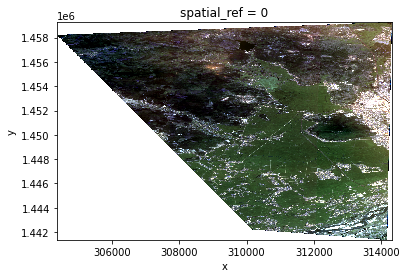

In [7]:
xr.plot.imshow(opt_stack.copy(data=display.scale(opt_stack.data)))

In [8]:
opt_stack

<xarray.DataArray 'BLUE GREEN RED' (z: 3, y: 2237, x: 1244)>
array([[[       nan,        nan,        nan, ..., 0.02729181,
         0.03021449, 0.0321508 ],
        [       nan,        nan,        nan, ..., 0.03289769,
         0.03252383, 0.03231718],
        [       nan,        nan,        nan, ..., 0.03253607,
         0.03250813, 0.03260763],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ..., 0.0325688 ,
         0.03575394, 0.03786882],
        [       nan,        nan,        nan, ..., 0.03874811,
         0.0377332 , 0.0372853 ],
        [       nan,        nan,        nan, ..., 0.03795209,
         0.03785328, 0.03810363],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ..., 0.02202989,
         0.02403895, 0.02508134],
        [       nan,        nan,        nan, ..., 0.02564428,
         0.02424301, 0.02346394],
        [       nan,        nan,        nan, ..., 0.0244639 ,
         0.02421321, 0.02448287],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
    spatial_ref  int64 0
  * x            (x) float64 3.044e+05 3.044e+05 ... 3.143e+05 3.143e+05
  * y            (y) float64 1.459e+06 1.459e+06 ... 1.441e+06 1.441e+06
  * z            (z) MultiIndex
  - variable     (z) object 'BLUE' 'GREEN' 'RED'
  - band         (z) int64 1 1 1
Attributes:
    long_name:         BLUE GREEN RED
    sensor:            CUSTOM
    sensor_id:         CUSTOM
    product_path:      /home/data/DS3/CI/eoreader/others/20200310T030415_WV02...
    product_name:      20200310T030415_WV02_Ortho_BGRN_STK
    product_filename:  20200310T030415_WV02_Ortho_BGRN_STK
    product_type:      CUSTOM
    acquisition_date:  20220307T174043
    condensed_name:    20220307T174043_CUSTOM_CUSTOM

In [9]:
# SAR minimum example
sar_prod = reader.open(sar_path,
                       custom=True,
                       sensor_type=SensorType.SAR,  # With the Enum
                       band_map={VV: 1, VV_DSPK: 2})
sar_prod

EOReader CustomProduct
Attributes:
	condensed_name: 20220307T174046_CUSTOM_CUSTOM
	name: 20210827T162210_ICEYE_SC_GRD_STK
	path: /home/data/DS3/CI/eoreader/others/20210827T162210_ICEYE_SC_GRD_STK.tif
	platform: CUSTOM
	sensor type: SAR
	product type: CUSTOM
	default resolution: 47.995955510616774
	acquisition datetime: 2022-03-07T17:40:46.174913
	band mapping:
		VV: 1
		VV_DSPK: 2
		HH: HH
		HH_DSPK: HH_DSPK
		VH: VH
		VH_DSPK: VH_DSPK
		HV: HV
		HV_DSPK: HV_DSPK
		RH: RH
		RH_DSPK: RH_DSPK
		RV: RV
		RV_DSPK: RV_DSPK
	tile name: N/A
	needs_extraction: False

In [10]:
sar_stack = sar_prod.stack([SLOPE, VV, VV_DSPK])

2022-03-07 17:40:47,104 - [DEBUG] - Warping DEM for 20220307T174046_CUSTOM_CUSTOM


2022-03-07 17:40:47,108 - [DEBUG] - Using DEM: /home/data/DS2/BASES_DE_DONNEES/GLOBAL/COPDEM_30m/COPDEM_30m.vrt


2022-03-07 17:40:49,836 - [DEBUG] - Computing slope for 20220307T174046_CUSTOM_CUSTOM


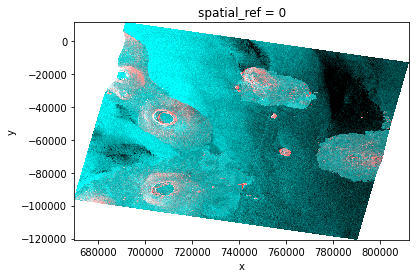

In [11]:
xr.plot.imshow(sar_stack.copy(data=display.scale(sar_stack.data)))

In [12]:
sar_stack

<xarray.DataArray 'SLOPE VV VV_DSPK' (z: 3, y: 2748, x: 2967)>
array([[[1.1417845 , 0.9661645 , 0.88848215, ..., 0.        ,
         0.        , 0.        ],
        [0.91908467, 0.8988768 , 0.9166924 , ..., 0.        ,
         0.        , 0.        ],
        [1.0019214 , 0.84933126, 0.86957526, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
    spatial_ref  int64 0
  * x            (x) float64 6.7e+05 6.701e+05 6.701e+05 ... 8.124e+05 8.124e+05
  * y            (y) float64 1.113e+04 1.109e+04 ... -1.206e+05 -1.207e+05
  * z            (z) MultiIndex
  - variable     (z) object 'SLOPE' 'VV' 'VV_DSPK'
  - band         (z) int64 1 1 1
Attributes:
    long_name:         SLOPE VV VV_DSPK
    sensor:            CUSTOM
    sensor_id:         CUSTOM
    product_path:      /home/data/DS3/CI/eoreader/others/20210827T162210_ICEY...
    product_name:      20210827T162210_ICEYE_SC_GRD_STK
    product_filename:  20210827T162210_ICEYE_SC_GRD_STK
    product_type:      CUSTOM
    acquisition_date:  20220307T174046
    condensed_name:    20220307T174046_CUSTOM_CUSTOM

<AxesSubplot:>

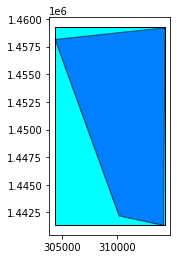

In [13]:
# You can compute the footprint and the extent
extent = opt_prod.extent
footprint = opt_prod.footprint
base = extent.plot(color='cyan', edgecolor='black')
footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)

<AxesSubplot:>

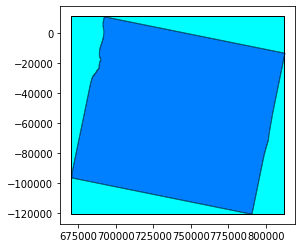

In [14]:
extent = sar_prod.extent
footprint = sar_prod.footprint
base = extent.plot(color='cyan', edgecolor='black')
footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)

In [15]:
# Optical
opt_prod = reader.open(
    opt_path,
    custom=True,
    name="20200310T030415_WV02_Ortho",
    acquisition_datetime="20200310T030415",
    sensor_type=SensorType.OPTICAL,
    platform="WV02",
    product_type="Ortho",
    default_resolution=2.0,
    sun_azimuth=10.0,
    sun_zenith=20.0,
    band_map={BLUE: 1, GREEN: 2, RED: 3, NIR: 4, SWIR_1: 5},
)
hillshade = opt_prod.load(HILLSHADE)[HILLSHADE]

2022-03-07 17:40:53,332 - [DEBUG] - Warping DEM for 20200310T030415_WV02_Ortho


2022-03-07 17:40:53,335 - [DEBUG] - Using DEM: /home/data/DS2/BASES_DE_DONNEES/GLOBAL/COPDEM_30m/COPDEM_30m.vrt


2022-03-07 17:40:54,561 - [DEBUG] - Computing hillshade DEM for 20200310T030415_WV02_Ortho


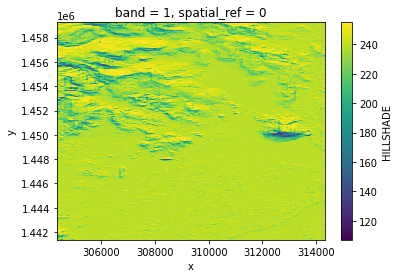

In [16]:
hillshade.plot()

In [17]:
hillshade

<xarray.DataArray 'HILLSHADE' (band: 1, y: 8948, x: 4976)>
array([[[247.08548, 247.24815, 247.46588, ..., 239.47937, 239.50516,
         239.53088],
        [247.11534, 247.26105, 247.46346, ..., 239.47493, 239.50067,
         239.52643],
        [247.14246, 247.27325, 247.46161, ..., 239.47063, 239.4964 ,
         239.52213],
        ...,
        [247.89555, 248.04086, 248.18428, ..., 239.4887 , 239.52728,
         239.5658 ],
        [247.07147, 247.22208, 247.37198, ..., 239.4823 , 239.5209 ,
         239.55937],
        [246.18985, 246.34518, 246.50163, ..., 239.47559, 239.51418,
         239.55264]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 3.044e+05 3.044e+05 ... 3.143e+05 3.143e+05
  * y            (y) float64 1.459e+06 1.459e+06 ... 1.441e+06 1.441e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:      1.0
    add_offset:        0.0
    long_name:         HILLSHADE
    sensor:            WorldView-2
    sensor_id:         WV02
    product_path:      /home/data/DS3/CI/eoreader/others/20200310T030415_WV02...
    product_name:      20200310T030415_WV02_Ortho
    product_filename:  20200310T030415_WV02_Ortho_BGRN_STK
    product_type:      Ortho
    acquisition_date:  20200310T030415
    condensed_name:    20200310T030415_WV02_Ortho

In [18]:
# SAR
sar_prod = reader.open(
    sar_path,
    custom=True,
    sensor_type=SensorType.SAR,
    name="20210827T162210_ICEYE_SC_GRD",
    acquisition_datetime="20210827T162210",
    platform="ICEYE",
    product_type="GRD",
    default_resolution=6.0,
    band_map={VV: 1, VV_DSPK: 2},
)

In [19]:
from pprint import pprint
from eoreader import utils

# Read and display metadata
mtd, _ = sar_prod.read_mtd()
pprint(utils.quick_xml_to_dict(mtd))

('custom_metadata',
 {'band_names': "{'VV': 1, 'VV_DSPK': 2}",
  'datetime': '2021-08-27 16:22:10',
  'name': '20210827T162210_ICEYE_SC_GRD',
  'platform': 'Platform.ICEYE',
  'product_type': 'GRD',
  'resolution': '6.0',
  'sensor_type': 'SensorType.SAR',
  'sun_az': 'None',
  'sun_zen': 'None'})
